In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')
pd.set_option('display.max_rows', 500)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Drop duplicate rows of data
df = df.drop_duplicates()
df.shape

# No duplicate data 

(8807, 12)

In [7]:
# Check for missing data
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [8]:
# Changing the datetype of date_added column
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Movie      6131
TV Show    2676
Name: type, dtype: int64


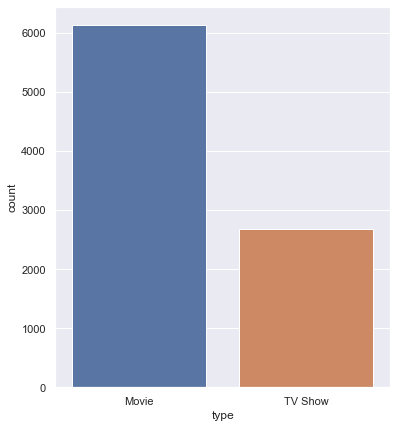

In [12]:
# Does Netflix has more focus on TV Shows than movies in recent years.
count_type = df['type'].value_counts()
print(count_type)

# Showing the result graphically
sns.set(rc = {'figure.figsize':(6, 7)})
ax = sns.countplot(x = 'type', data = df)

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64


<AxesSubplot:xlabel='country', ylabel='count'>

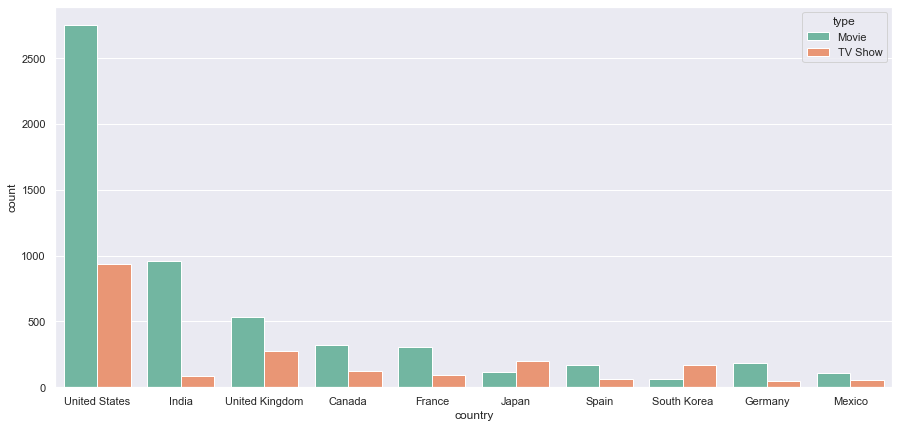

In [14]:
# Checking which countries have higher number of streaming

df = df.assign(country=df['country'].str.split(',')).explode('country')
df['country'] = df['country'].str.strip()
print(df['country'].value_counts()[:10])

sns.set(rc = {'figure.figsize':(15, 7)})
sns.countplot(x="country", hue="type", data=df, palette="Set2",
              order=df.country.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='date_added', ylabel='Count'>

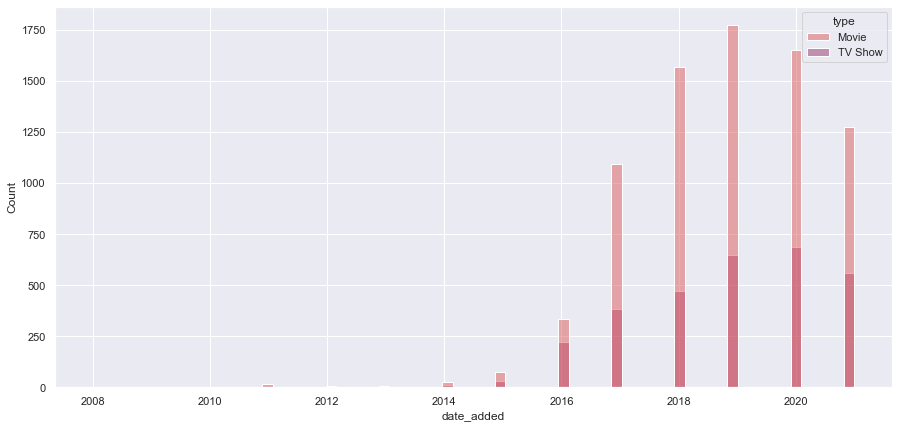

In [15]:
# Type (Movies/TV shows) released with respect to time

sns.set(rc={'figure.figsize':(15, 7)})
sns.histplot(data = df, x = df['date_added'].dt.year, hue =df['type'], palette='flare')

Anupam Kher           46
David Attenborough    45
Vincent Tong          42
John Cleese           40
Tara Strong           39
Shah Rukh Khan        38
Liam Neeson           36
Andrea Libman         36
Ashleigh Ball         35
Om Puri               35
Name: cast, dtype: int64


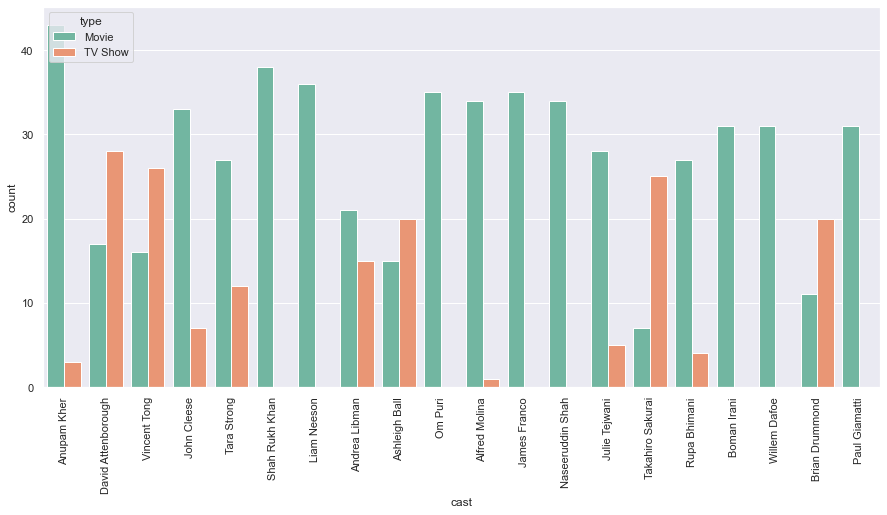

In [38]:
# Cast with maximum number of tvshows/movie

casts_count = df.copy()
casts_count = casts_count.assign(cast=casts_count['cast'].str.split(',')).explode('cast')
casts_count['cast'] = casts_count['cast'].str.strip()
print(casts_count['cast'].value_counts()[:10])

sns.set(rc = {'figure.figsize':(15, 7)})
ax = sns.countplot( data=casts_count, x="cast", hue='type', palette="Set2",
              order=casts_count.cast.value_counts().iloc[:20].index)
ax.tick_params(axis='x', rotation=90)